In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
# Load the dataset
(train_ds, test_ds), ds_info = tfds.load('stanford_dogs',
                                         split=['train', 'test'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

In [19]:
# resize images, flatten each image to a 1D array, and convert dataset to numpy arrays
def dataset_to_numpy(dataset, img_size=(224, 224)):
    images = []
    labels = []
    for image, label in tfds.as_numpy(dataset):
        image = tf.image.resize(image, img_size).numpy()
        image = image.flatten()  # Flatten the image to a 1D array
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = dataset_to_numpy(train_ds)
test_images, test_labels = dataset_to_numpy(test_ds)

In [17]:
# Linear dimensionality reduction of the images using principal components analysis
from sklearn.decomposition import PCA

# Flatten the images
n_samples, height, width, channels = train_images.shape
train_images_flattened = train_images.reshape(n_samples, height * width)

# Perform PCA on the top 300 images in the dataset
n_components = 300
pca = PCA(n_components=n_components)
pca.fit(train_images_flattened)
eigenimages = pca.components_.reshape((n_components, height, width))

# Now eigenimages contains the principal components reshaped to the original image dimensions


ValueError: too many values to unpack (expected 3)

In [18]:
train_images.shape

(12000, 224, 224, 3)

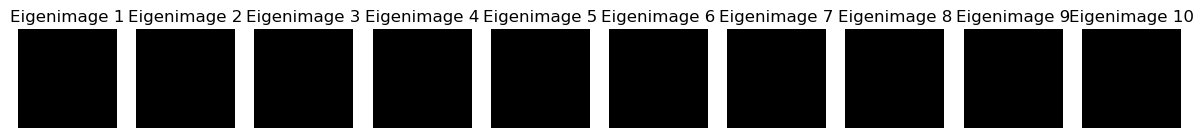

In [15]:
# BEGIN: show the eigenimages
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(eigenimages[i].astype("uint8"))
    ax.set_title(f"Eigenimage {i+1}")
    ax.axis('off')
plt.show()
# END: show the eigenimages

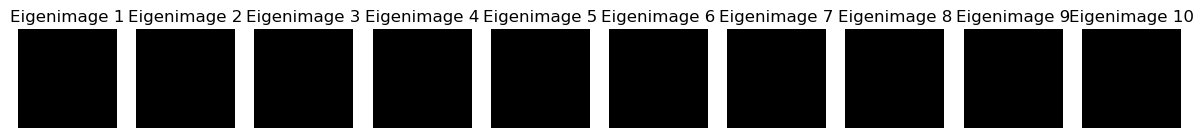